# Fast-Free Time-Resolved Electrostatic Force Microscopy (FF-trEFM)
### Rajiv Giridharagopal, Ph.D. 
#### rgiri@uw.edu
Department of Chemistry  
University of Washington  
Box 351700  
Seattle, Washington, USA 98195  

* [Github link](https://github.com/rajgiriUW/ffta)
* [Documentation (in progress)](https://ffta.readthedocs.io/)

This notebook walks through the basics of processing data acquired off an AFM into instantaneous frequency. In this specific example, the data are stored line-by-line as .IBW files (from an Asylum Research instrument), with an associated image. In this example, we have a perovskite solar cell and some time-dependent data at each pixel in response to illumination.

There are two basic parts, the first of which is flexible:

1) Loading your raw data into a pyUSID-compatible HDF5 format. 

2) Processing the data

In the Ginger Lab, the data are saved as a series of IBW files with an associated .CFG file. 

### 1) Setup

You can see the instructions at the Github repo above to set up FFTA specifically. The setup file should prompt for installation of certain relevant packages, particularly PyUSID and SidPy that are used to manipulate our data.

In [10]:
import ffta
import pyUSID as usid
import numpy as np
from matplotlib import pyplot as plt

### 2) Loading data

Typically you have a multi-layered image (an IBW, say) with the topography+associated channels saved, and for transient analysis a folder of data associated with the image. FFTA also requires a parameters.cfg file, an example of which is in the main FFTA folder (example_parameters.cfg)

It is certainly possible to just process the folder of data and not have an image; this approach is mostly to use an advantage of Pycroscopy wherein all the data associated with a particularly measurement are held together.

For this notebook, we will use an example of a perovskite dataset (butylammonium lead triiodide, often called by diminuitive "BAPI"). Download the files in the folder at the link below, it is ~240 MB in size. 

* [IBW Files](https://drive.google.com/drive/folders/168fJmiDekdAfhz1j-rF3XGpv5BBdEK37?usp=sharing) (copy **ALL** the files to a local folder)

* [Associated Topography Image](https://drive.google.com/open?id=18mCQjdv6q13lW8UC5wus8jlCUyHHkQ2f&authuser=rgiri%40uw.edu&usp=drive_fs) 

In [6]:
# Set the FF_FOlder to whereever you downloaded the data.
ibw_folder = r'FOLDER_WHERE_YOU_SAVED_THE_IBW_FILES'
topo_path = r'PATH_WHERE_YOU_SAVED_THE_ASSOCIATED_TOPOGRAPHY_IMAGE'

# In my case, that's this:
# Comment out this line on your machine
ibw_folder = r'G:\My Drive\FFTA_Notebook\notebook_data\perovskite'
topo_path = r'G:\My Drive\FFTA_Notebook\notebook_data\perovskite_example.ibw'

#### 2A) Load data

This command will then convert your data into an HDF5 (.h5) file on your local disk. It will be autosaved in the folder with the IBW. You have 2 options

1) Load the data including the topo in one command (```ffta.load.load_hdf.load_wrapper```)

2) Load just the IBW files (the trEFM data) (```ffta.load.load_hdf.load_folder``` and ```ffta.load.load_hdf.load_FF```)

The end result is a a subfolder called ```FF_Avg``` that contains the trEFM data. 

Once this process has completed you no longer need the IBW files as the data are within the .H5 file. You should keep a backup on the associated storage of your choosing, but locally that is safe unless you need to reprocess the data.

For this notebook, we will use Option 1. For future reference, this would be the command sequence for option 2:

```
h5_path, data_files, parm_dict = ffta.load.load_hdf.load_folder(ff_folder) # processes the folder into file paths
h5_avg = ffta.load.load_hdf.load_FF(data_files, parm_dict, h5_path) # Saves the data into an HDF
```

The next cell does **Option 1: Saving Topo and trEFM files all at once**

In [7]:
# If in Spyder or an equivalent IDE, the following brings up a dialogue box for selecting the files
# h5_path, parm_dict, h5_avg = ffta.load.load_hdf.load_wrapper()

# Otherwise, input them manually
h5_path, parm_dict, h5_avg = ffta.load.load_hdf.load_wrapper(ibw_file_path=topo_path, ff_file_path=ibw_folder)

c:\users\raj\documents\coding\sidpy\sidpy\sid\translator.py:44: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  FutureWarning)
c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'


G:\My Drive\FFTA_Notebook\notebook_data\perovskite folder path
Loading first signal
#### FFtrEFM_0002.ibw ####
#### FFtrEFM_0003.ibw ####
#### FFtrEFM_0004.ibw ####
#### FFtrEFM_0005.ibw ####
#### FFtrEFM_0006.ibw ####
#### FFtrEFM_0007.ibw ####
#### FFtrEFM_0008.ibw ####
#### FFtrEFM_0009.ibw ####
#### FFtrEFM_0010.ibw ####
#### FFtrEFM_0011.ibw ####
#### FFtrEFM_0012.ibw ####
#### FFtrEFM_0013.ibw ####
#### FFtrEFM_0014.ibw ####
#### FFtrEFM_0015.ibw ####
#### FFtrEFM_0016.ibw ####
#### FFtrEFM_0017.ibw ####
#### FFtrEFM_0018.ibw ####
#### FFtrEFM_0019.ibw ####
#### FFtrEFM_0020.ibw ####
#### FFtrEFM_0021.ibw ####
#### FFtrEFM_0022.ibw ####
#### FFtrEFM_0023.ibw ####
#### FFtrEFM_0024.ibw ####
#### FFtrEFM_0025.ibw ####
#### FFtrEFM_0026.ibw ####
#### FFtrEFM_0027.ibw ####
#### FFtrEFM_0028.ibw ####
#### FFtrEFM_0029.ibw ####
#### FFtrEFM_0030.ibw ####
#### FFtrEFM_0031.ibw ####
*** Copy-Paste below code for IDE access to h5***
import h5py
h5_file = h5py.File(r'G:\My Drive\FFTA_Noteb

#### 2B) Using PCA to clean up the data

Here's an example of why Pycroscopy is useful. PCA-based filtering is an essential step as it removes much of the related noisy components. Pycroscopy provides a convenient wrapper to store this processing within the same HDF5 file, so we now have the *raw* and *filtered* data in the ***same HDF5 file***.

1. Here we use SVD to visualize the principal components. We can then filter all the noisy components when reconstructing the data. The vast majority of data in FFtrEFM tends to be within the first ~10 components, give or take. 

2. The second block plots some of the outputs. The "abundance maps" show the weighting of the components at each pixel, and the "eigenvectors" can be used to visualize what each component represents. 

3. Finally, we decide to reconstruct the data but remove the components that contribute to noise. In this example, those are components 6 to the end, so we set the ```clean_components = [0,1,2,3,4,5]``` (you can also write just [0,5])

In [8]:
# 1. SVD
h5_svd = ffta.analysis.svd.test_svd(h5_avg, show_plots=False) #these plots don't work well in Jupyter

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file
Took 2.62 sec to compute randomized SVD
Need 1 components for 80%
Need 1 components for 90%
Need 2 components for 95%
Need 83 components for 99%


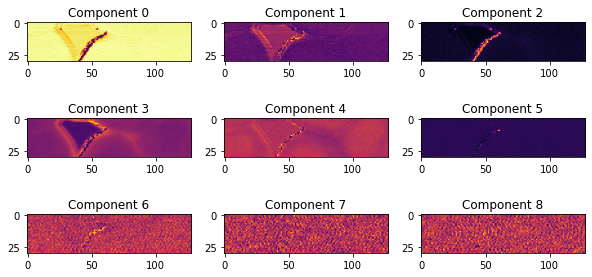

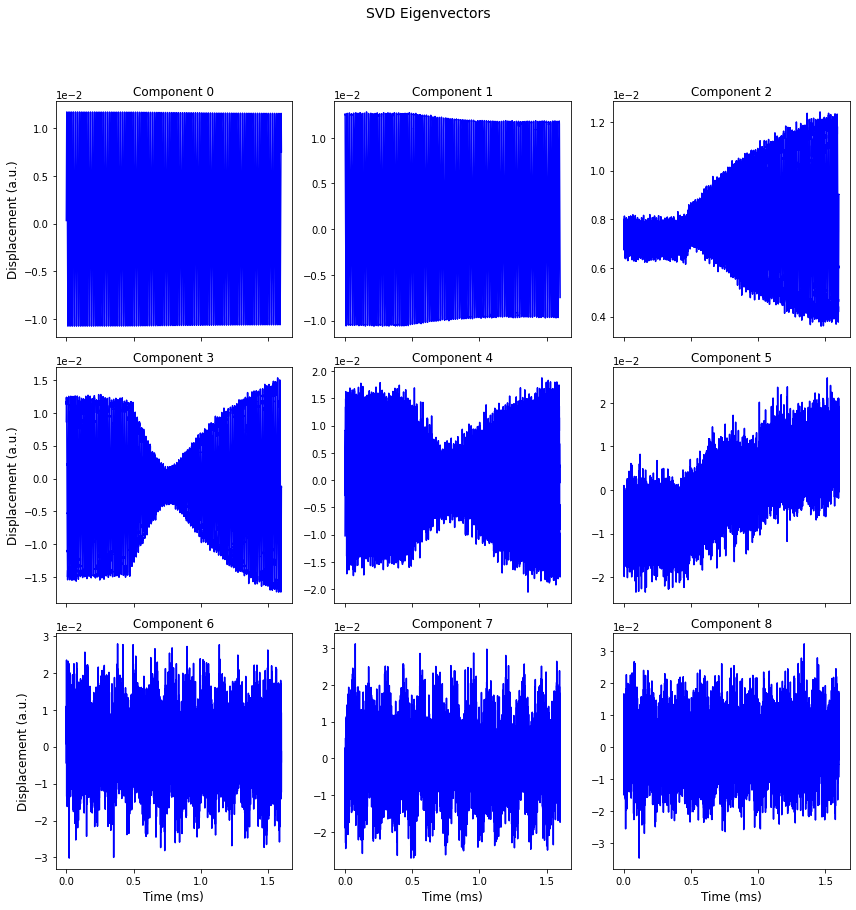

In [17]:
# 2. Plot the SVD Output

# If you run show_plots=True above, this block is essentially shown automatically. 
# But, to give you an idea of what's happening, let's take a look

# Plot abundance maps correctly
h5_U = h5_svd['U']
h5_V = h5_svd['V']
h5_S = h5_svd['S']

num_rows = parm_dict['num_rows']
num_cols = parm_dict['num_cols']

abun_maps = np.reshape(h5_U[:,:25], (num_rows, num_cols,-1))
eigen_vecs = h5_V[:16, :]

num_abun_rows = 3
num_abun_cols = 3
fig, a = plt.subplots(nrows=num_abun_rows, ncols=num_abun_cols, figsize=(10,5))
a[0][0].set_title('Abundance Maps')

tt = np.transpose(abun_maps, (2, 0, 1))

# The pycroscopy plot wrapper doesn't work in Jupyter
for r in range(num_abun_rows):
    for c in range(num_abun_cols):
        
        a[r][c].imshow(tt[:][:][r*num_abun_rows+c], cmap='inferno')
        a[r][c].set_title('Component ' + str(c+r*3))

h5_spec_vals = h5_avg.get_spec_values('Time')
fig_eigvec, axes = usid.viz.plot_utils.plot_curves(h5_spec_vals*1e3, eigen_vecs, use_rainbow_plots=False, 
                                                 x_label='Time (ms)', y_label='Displacement (a.u.)', 
                                                 num_plots=9, subtitle_prefix='Component', 
                                                 title='SVD Eigenvectors', evenly_spaced=False)

In [18]:
# 3. Filter and Rebuild the Data
clean_components = [0, 1, 2, 3, 4, 5] # change based on SVD

h5_rb = ffta.analysis.svd.svd_filter(h5_avg, clean_components)

Reconstructing in batches of 2156 positions.
Batchs should be 789.6001281738281 Mb each.
Completed reconstruction of data from SVD results.  Writing to file.
Done writing reconstructed data to file.


#### 2C) Print out the result (optional)

Let's examine the tree structure of the HDF 5 now to get an idea of what's happening

You'll see a few folders.

* ```FF_Group``` The parent folder
* ```FF_Avg``` The processed "raw" data
* ```FF_Avg-SVD_000``` The folder with PCA-filtered data (using SVD)
* ```Rebuilt_Data_000``` The folder with the rebuilt data. If you repeat it, a new ```_001``` folder would be generated
* ```Rebuilt_Data``` The rebuilt data. **This is the dataset upon which we will operate***

/
FF_Group
FF_Group/FF_Avg
FF_Group/FF_Avg-SVD_000
FF_Group/FF_Avg-SVD_000/Position_Indices
FF_Group/FF_Avg-SVD_000/Position_Values
FF_Group/FF_Avg-SVD_000/Rebuilt_Data_000
FF_Group/FF_Avg-SVD_000/Rebuilt_Data_000/Rebuilt_Data
FF_Group/FF_Avg-SVD_000/S
FF_Group/FF_Avg-SVD_000/Spectroscopic_Indices
FF_Group/FF_Avg-SVD_000/Spectroscopic_Values
FF_Group/FF_Avg-SVD_000/U
FF_Group/FF_Avg-SVD_000/V
FF_Group/FF_Avg-SVD_000/completed_positions
FF_Group/Position_Indices
FF_Group/Position_Values
FF_Group/Spectroscopic_Indices
FF_Group/Spectroscopic_Values
Position_Indices
Position_Values
Spectroscopic_Indices
Spectroscopic_Values
charging_000
charging_000/Position_Indices
charging_000/Position_Values
charging_000/Raw_Data
charging_000/Spectroscopic_Indices
charging_000/Spectroscopic_Values
height_000
height_000/Position_Indices
height_000/Position_Values
height_000/Raw_Data
height_000/Spectroscopic_Indices
height_000/Spectroscopic_Values
shift_000
shift_000/Position_Indices
shift_000/Position_Va

Text(0.5, 0, 'Time (ms)')

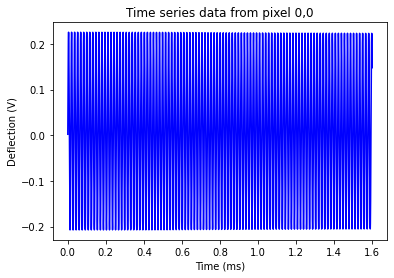

In [21]:
# Print out the tree to see what we has
usid.hdf_utils.print_tree(h5_rb.file, rel_paths=True)

tx = 1e3 * np.arange(0,h5_rb.attrs['total_time'], 1/h5_rb.attrs['sampling_rate'])[:-1]
plt.plot(tx, h5_rb[0,:], 'b')
plt.title('Time series data from pixel 0,0')
plt.ylabel('Deflection (V)')
plt.xlabel('Time (ms)')

### 3) Instaneous Frequency Processing using PyUSID

At this point we have:  

    1. an H5 file with the raw and averaged data.  
    2. a processed set of the deflection data from PCA  
   
We then use the PyUSID [Process](https://pycroscopy.github.io/pyUSID/auto_examples/intermediate/plot_process.html) class to help speed up and debug the processing of this dataset. In this case, we have a class FFtrEFM that inherits Process.


In [22]:
# Create our Process class
# Change Override to "True" if you want to redo this process
data = ffta.hdf_utils.process.FFtrEFM(h5_rb, override=False)

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file


Let's see what the data look like using our written function test()

[array([-6.89974069e+06, -6.89974069e+06, -6.89974069e+06, ...,
        -6.87262386e+01, -5.27562055e+01, -3.77078623e+01]),
 array([1.78397510e-08, 1.78397510e-08, 1.78397510e-08, ...,
        2.71953611e-08, 2.71613992e-08, 2.71308285e-08]),
 array([-1.6363967 , -1.6363967 , -1.6363967 , ...,  1.58041034,
         1.580399  ,  1.58042244]),
 4.38e-05,
 -10.88557555756673,
 array([-1.06182708e-08, -1.06182708e-08, -1.06182708e-08, ...,
         6.72322342e-11,  6.71646262e-11,  6.71044018e-11])]

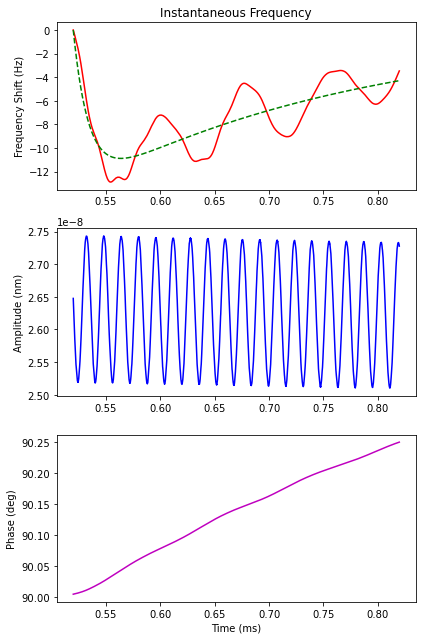

In [25]:
data.test(pixel_ind=[10,10]) # default pixel is 0,0, but let's pick another one

That looks...okay. But maybe we can do a little better.
We can update the parameters using the FFtrEFM Class function "update_parm"

In this case, lets filter the amplitude, and we'll set the region-of-interest for plotting the instananeous frequency to be only 300 us after the trigger. Let's also adjust the trigger to be about 20 us ahead.

[array([-6.52473101e+06, -6.52473101e+06, -6.52473101e+06, ...,
        -2.79847686e+02, -2.79866807e+02, -2.85106511e+02]),
 array([1.78397510e-08, 1.78397510e-08, 1.78397510e-08, ...,
        2.65615606e-08, 2.65875406e-08, 2.66423151e-08]),
 array([-1.63496776, -1.63496776, -1.63496776, ...,  1.57934087,
         1.57936974,  1.57939831]),
 8.92e-05,
 -13.190536688431953,
 array([-9.24339002e-09, -9.24339002e-09, -9.24339002e-09, ...,
         6.54543044e-11,  6.55183026e-11,  6.56480226e-11])]

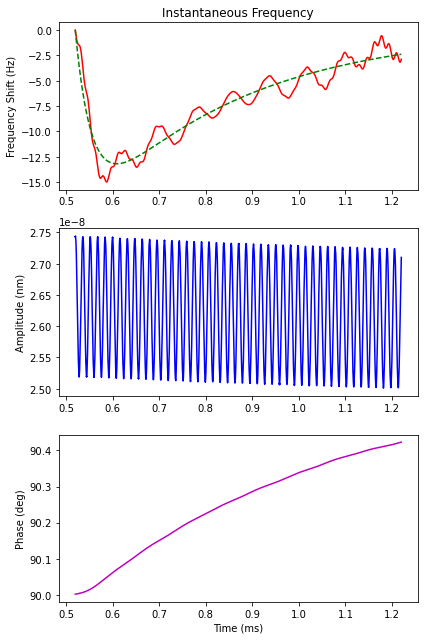

In [29]:
data.update_parm(filter_amp=True, roi=0.0007, trigger=0.00052, n_taps=1399)
data.test(pixel_ind=[10,10])

That's more like it! But what if we want to try, say, STFT (short-time Fourier transform) instead of the Hilbert transform that is the default?

Error with nfft setting
Error with nfft setting


c:\users\raj\documents\coding\ffta\ffta\ffta\pixel.py:599: RuntimeWarning: invalid value encountered in true_divide
  B = self.Q * self.DriveAmplitude * np.sin(phase) / self.amplitude


[array([-62697.465271, -62697.465271, -62697.465271, ..., -62697.465271,
        -62697.465271, -62697.465271]),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.]),
 6.12e-05,
 -2.0633619082323102,
 array([nan, nan, nan, ..., nan, nan, nan])]

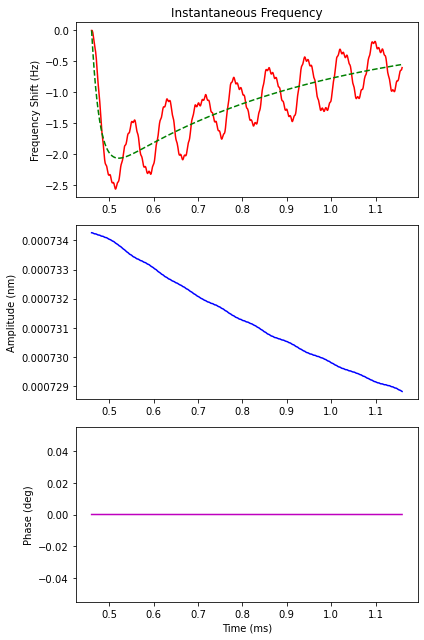

In [34]:
# Using STFT
# Ignore the "error with nfft setting", it's more for fine-tuning the spectrogram
data.update_parm(method='stft', fft_time_res=8e-5, trigger=0.00046)
data.test(pixel_ind=[10,10])

Oh no! That looks much worse. Okay, we'll go back to our Hilbert approach for now. Note that there is also a CWT option (method='wavelet') but it is currently in the debugging stage. 

So we'll reset our data parameters. Finally, we'll use the Process compute() function to parallel compute the results! Compared to serial analysis, it's around 70% faster using the Process class. This next cell will take a few minutes to run, depending on your computer. Hilbert is overwhelmingly the fastest method so far that we have. 

In [35]:
data.update_parm(filter_amp=True, roi=0.0007, trigger=0.00052, n_taps=1399, method='hilbert')
data.compute()

Creating results datasets


c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\users\raj\documents\coding\pyusid\pyusid\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'


	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 finished parallel computation
Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!


<HDF5 group "/FF_Group/FF_Avg-SVD_000/Rebuilt_Data_000/Rebuilt_Data-Fast_Free_000" (11 members)>

The result is a new folder with a bunch of data written. The original data are N x M pixels, with T time points per pixel

    **(N x M, 1)** 
    tfp: the time-to-first-peak data, in time. This is usually the image of interest  
    shift: the frequency shift data, which is mostly equivalent to standard EFM  
    
    **(N x M, T)**
    amplitude: the amplitude of the signal at each time slice
    phase: phase of the signal at each time slice
    inst_freq: the actual instantaneous frequency data at each time slice per pixel. 
    
    **H5 Reference**
    h5_if: the Pycroscopy H5 reference to the processed image file. 
    
We need to do a few more things before we wrap up
1. **RESHAPE**. reshape the tfp/shift to be in matrix shape. The inst_freq can stay the same as it's analyzed in PyUSID, but the tFP/shift are often plotted separately
2. **PLOT**. plot the data to make sure it looks okay. If we have a topo image in the same HDF5 file, it will also be plotted
3. **SAVE CSV** save the data in CSV format so we can import into other data software (Igor, MATLAB, Excel, etc)


Saving from FFtrEFM Class
/FF_Group/FF_Avg-SVD_000/Rebuilt_Data_000/Rebuilt_Data-Fast_Free_000


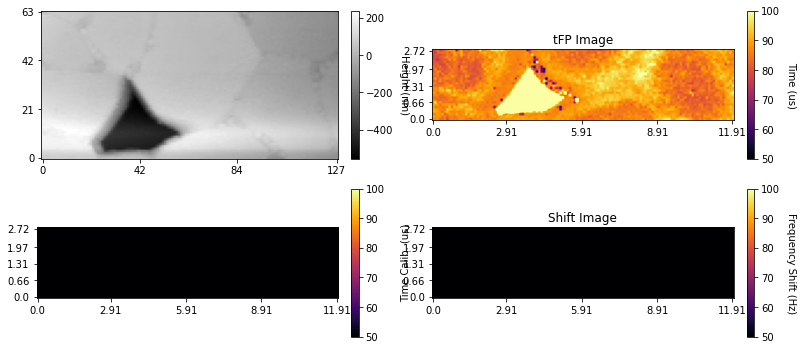

In [53]:
data.reshape()
_, ax = ffta.hdf_utils.process.plot_tfp(data, vmin=50, vmax=100)
ht = h5_avg.file['height_000/Raw_Data'][:, 0].reshape(128, 64).transpose()
h5_image, cbar = usid.plot_utils.plot_map(ax[0][0], ht*1e9, cmap='gray')
cbar.set_label('Height (nm)', rotation=270, labelpad=16)

ffta.hdf_utils.process.save_CSV_from_file(data, append='_string_to_identify_data')

#### And that's it! Now close the file. This is important!

In [54]:
# You should make sure to close the file explicitly to preserve the data
h5_rb.file.close()

------------
##### Some useful Pycroscopy/FF-trEFM functionality for accessing specific data

Get an H5 file:
> h5_path = 'file_path_to_h5.h5'

Load some of the relevant datasets. This will give a list of commands you copy-paste to the workspace:
> ffta.hdf_utils.load_hdf.hdf_commands(h5_path)

Print the file structure
> usid.io.hdf_utils.print_tree(h5_file, rel_paths=True)

Name of the H5 File (what is it saved as on disk). Replace "h5_main" with name of a dataset, like h5_if, h5_rb, etc:
> h5_main.file

Get an individual pixel from dataset h5_rb at location 5, 5. Analyze in FF-trEFM. Plot the result:
> pix = ffta.hdf_utils.get_utils.get_pixel(h5_rb, [5, 5])  
> pix.analyze()  
> pix.plot()  

Get the parameters associated with a dataset. This is just an alias to usid.hdf_utils.get_attributes(h5_path)
> params = ffta.hdf_utils.get_utils.get_params(h5_rb)

